<a href="https://colab.research.google.com/github/Byeon-MJ/TIL/blob/main/%5BDL%5D_PyTorch_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch로 인공 신경망(ANN) 구현하기

## 간단한 분류 모델 구현
* XOR 문제 풀이

## 데이터셋 만들기

In [21]:
from sklearn.datasets import make_blobs

In [62]:
# Train : 80개
x_train, y_train = make_blobs(
    random_state = 100,
    n_samples = 80,                 # 생성할 데이터 수
    n_features = 2,                 # 특성 갯수(차원)
    centers = [[1, 1], [-1, -1], 
               [1, -1], [-1, 1]],   # 중심점
    shuffle = True, 
    cluster_std = 0.3               # 중심점으로부터의 표준편차
)

# Test : 20개
x_test, y_test = make_blobs(
    random_state = 100,
    n_samples = 20,
    n_features = 2,
    centers = [[1, 1], [-1, -1], 
               [1, -1], [-1, 1]],
    shuffle = True,
    cluster_std = 0.3
)

In [67]:
import numpy as np

# 이진분류 모델 만들기 : 4개의 레이블 -> 2개로 합치기
def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

In [68]:
y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)

y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

### 데이터셋 시각화

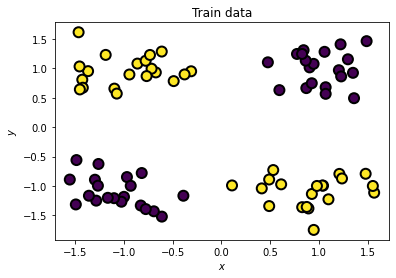

In [70]:
import matplotlib.pyplot as plt

plt.title('Train data')
plt.scatter(x_train[:, 0], x_train[:, 1], marker='o', c=y_train, s=100,
            edgecolor='k', linewidth=2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

## 신경망 모델 구현

* 파이토치는 신경망을 Class로 구현
* torch.nn.Module을 상속받음
* 활성화 함수로는 Relu와 Sigmoid 함수 사용
* ReLU : 입력값이 0보다 작으면 0을, 0보다 크면 입력값을 그대로 출력
* Sigmoid : 0과 1 사이의 값을 반환하는 함수

In [71]:
import torch
from torch import nn, optim

In [72]:
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)

In [73]:
# 신경망 Class 정의
class NeuralNet(torch.nn.Module):
    # 생성자
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size

        # 인공신경망 레이어 정의
        self.linear1 = nn.Linear(self.input_size, self.hidden_size)   # (입력 size, 출력 size)
        self.relu = nn.ReLU()                                         # Activation Function
        self.linear2 = nn.Linear(self.hidden_size, 1)                 # (앞 Layer의 출력값, Class수)
        self.sigmoid = nn.Sigmoid()                                   # Activation Function

    # 순전파
    def forward(self, input_tensor):
        h1 = self.linear1(input_tensor)
        h2 = self.relu(h1)
        h3 = self.linear2(h2)
        output = self.sigmoid(h3)

        return output

### 모델링 진행

In [74]:
x_train.shape

torch.Size([80, 2])

In [78]:
# 변수 설정
lr = 0.03
epochs = 2000
criterion = nn.BCELoss()  # Binary Cross Entropy

In [79]:
# 신경망 객체 생성
model = NeuralNet(2, 5)

# optimizer 정의 : 확률적 경사하강법
# model.parameters() : 모델 내부의 가중치 추출
optimizer = optim.SGD(model.parameters(), lr = lr)

### 학습을 통한 성능 개선

In [84]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # 학습 데이터 입력, 결과값 개선
    train_output = model(x_train)

    # 오차 계산
    train_loss = criterion(train_output.squeeze(), y_train)

    if epoch % 100 == 0:
        print(f'train loss at {epoch} : {train_loss.item()}')

    # 오차 역전파
    train_loss.backward()
    optimizer.step() # 호출할 때마다 가중치를 학습률만큼 갱신

train loss at 0 : 0.027139227837324142
train loss at 100 : 0.026356041431427002
train loss at 200 : 0.025614794343709946
train loss at 300 : 0.024913163855671883
train loss at 400 : 0.024248961359262466
train loss at 500 : 0.023618832230567932
train loss at 600 : 0.02301996573805809
train loss at 700 : 0.02245008945465088
train loss at 800 : 0.02190718613564968
train loss at 900 : 0.021389367058873177
train loss at 1000 : 0.02089502103626728
train loss at 1100 : 0.020422592759132385
train loss at 1200 : 0.019970588386058807
train loss at 1300 : 0.019537832587957382
train loss at 1400 : 0.019123094156384468
train loss at 1500 : 0.018725339323282242
train loss at 1600 : 0.01834356226027012
train loss at 1700 : 0.01797674223780632
train loss at 1800 : 0.01762394607067108
train loss at 1900 : 0.017284326255321503


### 학습 후 성능 측정

In [88]:
# 평가 모드 바꾸기
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print(f'학습 후 loss는 {test_loss.item()}')

학습 후 loss는 0.017321284860372543


## 모델 저장

In [89]:
# model.state_dict() : 모델의 가중치 저장(딕셔너리)
torch.save(model.state_dict(), './model.pt')

In [90]:
# from google.colab import files
# files.download('./model.pt')

## 학습된 모델 적용

In [91]:
# 학습된 모델의 가중치 적용
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>

In [92]:
new_model.eval()
new_model(torch.FloatTensor([-1, 1])).item()

0.9995137453079224